In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import statistics


def set_size(fraction_width=0.95, fraction_height=0.25):
    width_pt = 241.14749 # column width in pt
    height_pt = 626.0 # page height in pt

    fig_width_pt = width_pt * fraction_width
    fig_height_pt = height_pt * fraction_height
    inches_per_pt = 1 / 72.27

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_height_pt * inches_per_pt

    return fig_width_in, fig_height_in

## Star Benchmarks

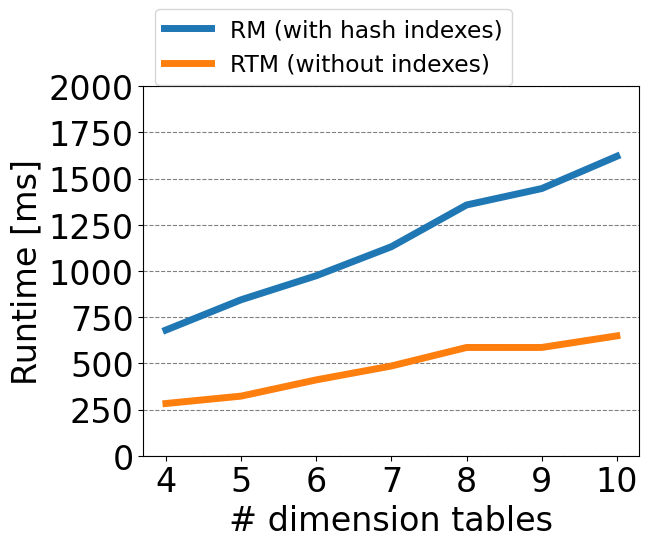

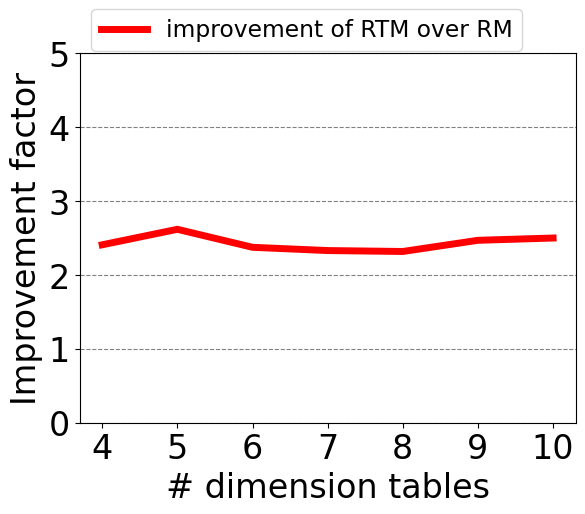

In [2]:
algorithm_times = {
    'ForeignKeys': [],
    'Pointers': [],
}

sizes = [i for i in range(4, 11)]
data = pd.read_csv(f'./results/results.csv')
data = data.groupby(by=['exp', 'type'], as_index=False).median()

for size in sizes:
    # Get Results for each query 
    size_data = data[data['exp'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['type']
        execution_time = row['time']
        if "foreign" in algorithm:
            algorithm_times['ForeignKeys'].append(execution_time)
        else:
            algorithm_times['Pointers'].append(execution_time)
#display(algorithm_times)
# plot 1: measurements
x = np.arange(len(sizes))
algorithm_names = {
    "ForeignKeys": "RM (with hash indexes)",
    "Pointers": "RTM (without indexes)"
}
for algorithm, time in algorithm_times.items():
    plt.plot(sizes, time, label=algorithm_names[algorithm], linewidth = '5')

fontsize: int = 24

plt.xlabel('# dimension tables', fontsize=fontsize)
plt.ylabel('Runtime [ms]', fontsize=fontsize)
plt.ylim(ymin=0,ymax=2000)
plt.grid(color='gray', linestyle='dashed', axis='y')
plt.legend(bbox_to_anchor=(0.0, 1.0), loc='upper left')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(bbox_to_anchor=(0.0, 1.24), loc='upper left', fontsize=fontsize*0.7)
plt.savefig("results_swizzling_runtimes.pdf", format="pdf", bbox_inches="tight")
plt.show()


# plot 2: improvement
# compute improvement
improvements = list(map(lambda x: x[0]/x[1], zip(algorithm_times['ForeignKeys'], algorithm_times['Pointers'])))
x = np.arange(len(sizes))
plt.plot(sizes, improvements, label="improvement of RTM over RM", color='red', linewidth = '5')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('# dimension tables', fontsize=fontsize)
plt.ylabel('Improvement factor', fontsize=fontsize)
plt.ylim(ymin=0, ymax=5)
plt.grid(color='gray', linestyle='dashed', axis='y')
plt.legend(bbox_to_anchor=(0.0, 1.15), loc='upper left', fontsize=fontsize*0.7)
plt.savefig("results_swizzling_improvements.pdf", format="pdf", bbox_inches="tight")


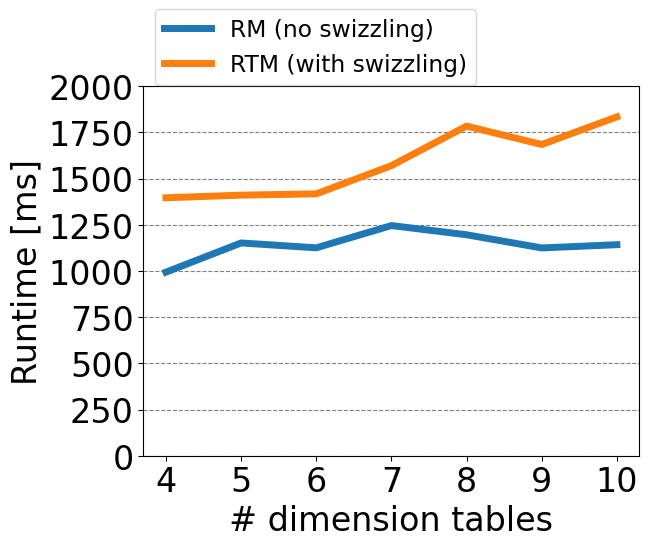

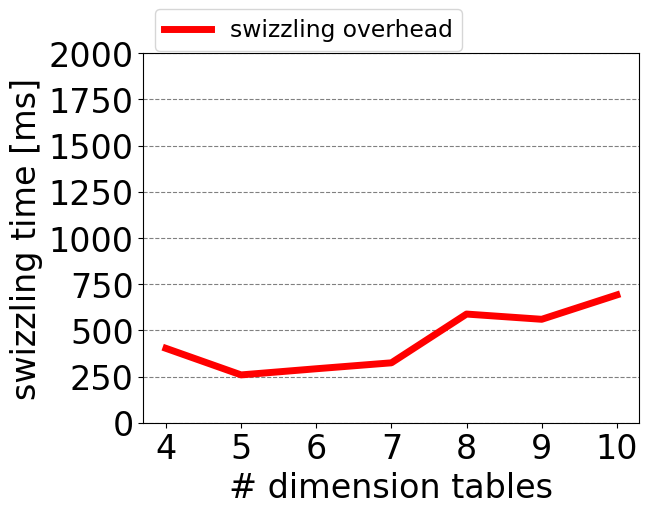

In [3]:
algorithm_times = {
    'ForeignKeys': [],
    'Pointers': [],
}

sizes = [i for i in range(4, 11)]
data = pd.read_csv(f'./results/results_build.csv')
data = data.groupby(by=['exp', 'type'], as_index=False).median()

for size in sizes:
    # Get Results for each query 
    size_data = data[data['exp'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['type']
        execution_time = row['time']
        if "foreign" in algorithm:
            algorithm_times['ForeignKeys'].append(execution_time)
        else:
            algorithm_times['Pointers'].append(execution_time)
# plot 1: measurements
x = np.arange(len(sizes))
algorithm_names = {
    "ForeignKeys": "RM (no swizzling)",
    "Pointers": "RTM (with swizzling)"
}
for algorithm, time in algorithm_times.items():
    plt.plot(sizes, time, label=algorithm_names[algorithm], linewidth = '5')

fontsize: int = 24

plt.xlabel('# dimension tables', fontsize=fontsize)
plt.ylabel('Runtime [ms]', fontsize=fontsize)
plt.ylim(ymin=0,ymax=2000)
plt.grid(color='gray', linestyle='dashed', axis='y')
plt.legend(bbox_to_anchor=(0.0, 1.0), loc='upper left')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(bbox_to_anchor=(0.0, 1.24), loc='upper left', fontsize=fontsize*0.7)
plt.savefig("results_swizzling_build_runtimes.pdf", format="pdf", bbox_inches="tight")
plt.show()

# plot 2: overheads
# compute overheads
overheads = list(map(lambda x: x[1]-x[0], zip(algorithm_times['ForeignKeys'], algorithm_times['Pointers'])))
#display(algorithm_times)
#display(overheads)
x = np.arange(len(sizes))
plt.plot(sizes, overheads, label="swizzling overhead", color='red', linewidth = '5')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('# dimension tables', fontsize=fontsize)
plt.ylabel('swizzling time [ms]', fontsize=fontsize)
plt.ylim(ymin=0,ymax=2000)
plt.grid(color='gray', linestyle='dashed', axis='y')
plt.legend(bbox_to_anchor=(0.0, 1.15), loc='upper left', fontsize=fontsize*0.7)
plt.savefig("results_swizzling_buildoverheads.pdf", format="pdf", bbox_inches="tight")
